In [ ]:
# Annotated follow-along guide_ Interpret multiple regression results with Python

# multicolinearity

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv("./csv/marketing_sales.csv")
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [ ]:
data.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [ ]:
# • TV promotional budget (in “Low,” “Medium,” and “High” categories)
# • Social media promotional budget (in millions of dollars)
# • Radio promotional budget (in millions of dollars)
# • Sales (in millions of dollars)
# • Influencer size (in “Mega,” “Macro,” “Micro,” and “Nano” categories)

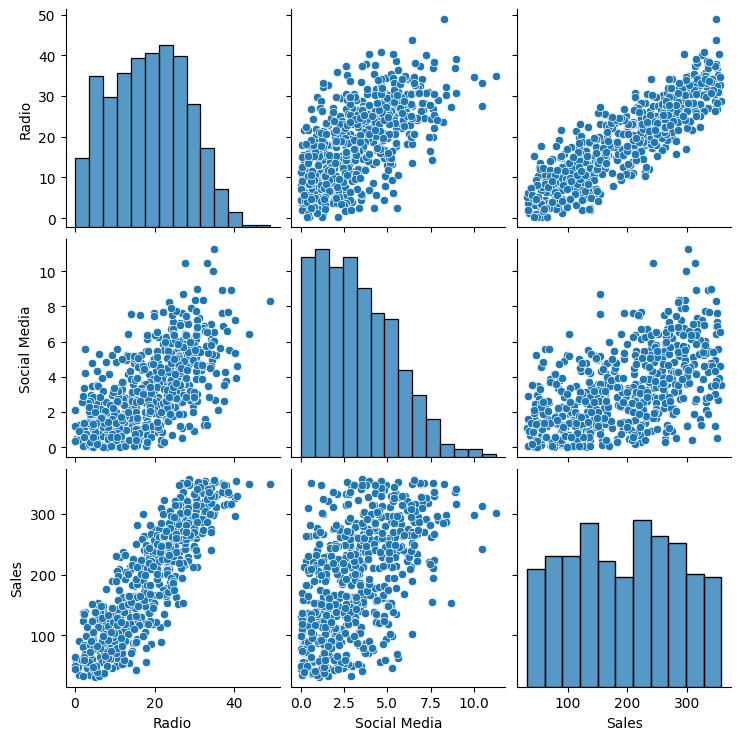

In [ ]:
sns.pairplot(data=data)

In [ ]:
tv_sales = data[["TV", "Sales"]]

In [ ]:
tv_sales_mean = tv_sales["Sales"].mean()

In [ ]:
influencer_sales = data[["Influencer", "Sales"]]

In [ ]:
influencer_sales_mean = influencer_sales["Sales"].mean()

In [ ]:
data.groupby("TV")["Sales"].mean()

TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64

In [ ]:
data.groupby("Influencer")["Sales"].mean()

Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.reset_index(inplace=True, drop=True)

In [ ]:
data.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [ ]:
data.rename(columns={"Social Media": "Social_Media"}, inplace=True)

In [ ]:
# Define the OLS formula.
# Create an OLS model.
# Fit the model.
# Save the results summary.
# Display the model results.

In [ ]:
data_X = data[["TV", "Radio", "Social_Media", "Influencer"]]
data_y = data[["Sales"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data_X, data_y, test_size=0.3, random_state=42
)

In [ ]:
ols_formula = "Sales ~ Radio + C(TV)"

In [ ]:
ols_data = pd.concat([X_train, y_train], axis=1)

In [ ]:
ols_data.iloc[1]

TV                  Medium
Radio            13.396217
Social_Media      4.181492
Influencer            Mega
Sales           164.760792
Name: 124, dtype: object

In [ ]:
data.iloc[1]

TV                  Medium
Radio            14.949791
Social_Media      0.274451
Influencer           Macro
Sales           222.741668
Name: 1, dtype: object

In [ ]:
from statsmodels.formula.api import ols

In [ ]:
OLS = ols(formula=ols_formula, data=ols_data)

In [ ]:
model = OLS.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     1184.
Date:                Mon, 23 Sep 2024   Prob (F-statistic):          1.20e-196
Time:                        09:00:28   Log-Likelihood:                -1890.1
No. Observations:                 398   AIC:                             3788.
Df Residuals:                     394   BIC:                             3804.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         212.3307      7.690     27.612      0.000     197.213     227.449
C(TV)[T.Low]     -148.6453      6.072    -24.480      0.000    -160.583    -136.708
C(TV)[T.Medium]   -72.1933      4.292    -16.820      0.000     -80.631     -63.755
Radio               2.9893      0.250     11.942      0.000       2.497       3.481
==============================================================================
Omnibus:                       18.541   Durbin-Watson:                   1.861
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.222
Skew:                           0.158   Prob(JB):                      0.00994
Kurtosis:                       2.324   Cond. No.                         152.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = data[["Radio", "Social_Media"]]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif = pd.DataFrame(vif, index=X.columns, columns=["VIF"])
df_vif

,VIF
Radio,4.93238
Social_Media,4.93238


In [ ]:
# For multiple linear regression to work well, some assumptions should be satisfied/ some prerequisites should be met.

# 1. Linearity

# The assumption of linearity means that the relationship between the dependent variable (y) and the independent variables (X) should be linear. If this assumption holds, changes in the predictors (independent variables) should result in proportional changes in the dependent variable.

# Why it’s important: If the relationship isn’t linear, the model may give inaccurate predictions.
# How to check: Plot the independent variables against the dependent variable using a scatter plot. If the points roughly form a straight line, the linearity assumption is satisfied.

In [ ]:
data_X

,TV,Radio,Social_Media,Influencer
0,Low,1.218354,1.270444,Micro
1,Medium,14.949791,0.274451,Macro
2,Low,10.377258,0.061984,Mega
3,High,26.469274,7.070945,Micro
4,High,36.876302,7.618605,Mega
...,...,...,...,...
564,High,28.210738,4.373466,Micro
565,Medium,23.578661,2.856657,Mega
566,Low,9.169824,0.067279,Nano
567,Low,11.563403,1.727947,Nano


In [ ]:
data_X["Radio"]

0       1.218354
1      14.949791
2      10.377258
3      26.469274
4      36.876302
         ...    
564    28.210738
565    23.578661
566     9.169824
567    11.563403
568    18.814801
Name: Radio, Length: 569, dtype: float64

In [ ]:
data_X["Radio"].shape

(569,)

In [ ]:
sns.scatterplot(x=data_X["Radio"], y=data_y)

ValueError: Data must be 1-dimensional, got ndarray of shape (569, 1) instead

In [ ]:
data_y.shape

(569, 1)

In [ ]:
data_y

,Sales
0,90.054222
1,222.741668
2,102.774790
3,328.239378
4,351.807328
...,...
564,302.887998
565,232.555023
566,73.888838
567,121.949570


In [ ]:
data_y["Sales"].shape

(569,)

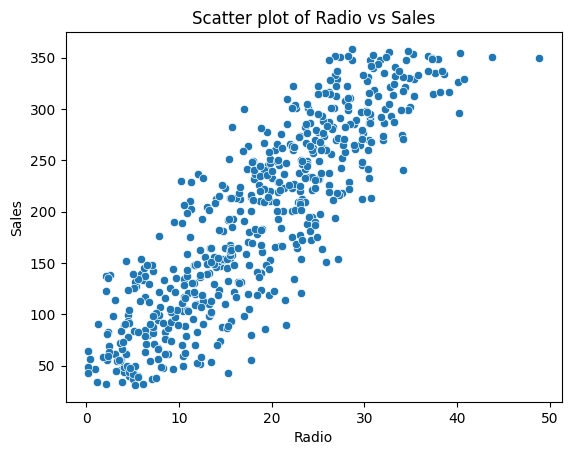

In [ ]:
# X can be one of your independent variables, and y is your dependent variable
sns.scatterplot(x=data_X["Radio"], y=data_y["Sales"])
plt.title("Scatter plot of Radio vs Sales")
plt.show()

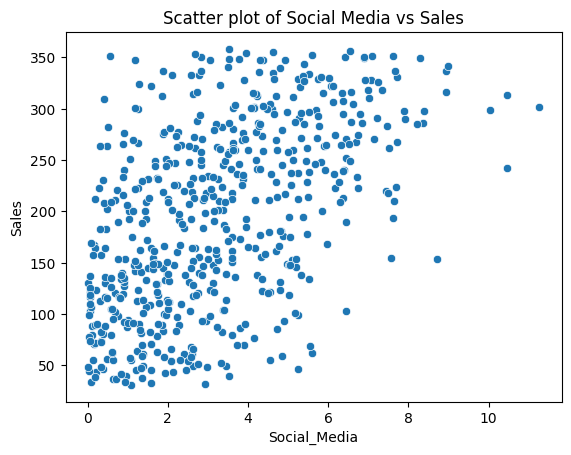

In [ ]:
sns.scatterplot(x=data_X["Social_Media"], y=data_y["Sales"])
plt.title("Scatter plot of Social Media vs Sales")
plt.show()

In [ ]:
# Here the relationship is linear between Radio and Sales but not for social media

In [ ]:
# Model assumption: Independence
# The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

In [ ]:
# Model assumption: Normality

In [ ]:
import scipy.stats as stats

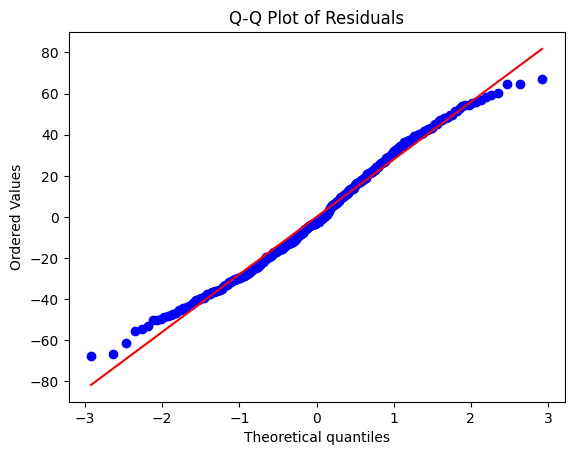

In [ ]:
# Q-Q plot
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

(array([ 5., 17., 52., 63., 74., 55., 54., 41., 25., 12.]),
 array([-67.79075308, -54.31021073, -40.82966838, -27.34912604,
        -13.86858369,  -0.38804134,  13.09250101,  26.57304336,
         40.05358571,  53.53412806,  67.0146704 ]),
 <BarContainer object of 10 artists>)

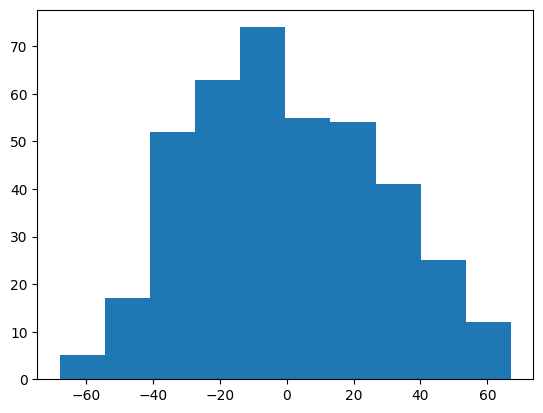

In [ ]:
plt.hist(model.resid)

In [ ]:
# Model assumption: No multicollinearity

In [ ]:
# Multicollinearity happens when two or more independent variables are highly correlated with each other. This makes it difficult to determine the effect of each independent variable on the dependent variable.

# Why it’s important: Multicollinearity can lead to unstable estimates of the regression coefficients, making it hard to interpret the model.
# How to check: Use the Variance Inflation Factor (VIF). A VIF value greater than 10 indicates high multicollinearity.

In [ ]:
X = data[["Radio", "Social_Media"]]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
df_vif = pd.DataFrame(vif, index=X.columns, columns=["VIF"])
df_vif

,VIF
Radio,4.93238
Social_Media,4.93238
